In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import random

In [2]:
def synthetic_data(w,b,num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

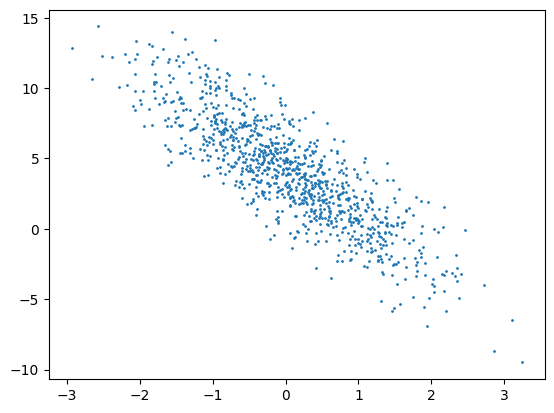

In [3]:
plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [4]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.2120, -0.0203],
        [-1.9756, -1.0586],
        [ 0.1584,  0.4742],
        [ 0.5144,  2.3531],
        [-0.6730,  0.4879],
        [ 1.1571,  0.1782],
        [-0.2981,  0.4545],
        [ 1.4970,  0.7083],
        [ 0.9997, -0.3138],
        [ 1.4042,  0.3241]]) 
 tensor([[ 4.7009],
        [ 3.8545],
        [ 2.9070],
        [-2.7803],
        [ 1.2087],
        [ 5.9101],
        [ 2.0525],
        [ 4.7826],
        [ 7.2457],
        [ 5.9128]])


In [5]:
w = torch.normal(0,0.01,(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [6]:
def linreg(X,w,b):
    return torch.matmul(X,w) + b

In [7]:
def squared_loss(y_hat,y):
    return (y_hat - y)**2 / 2

In [8]:
"""小批量随机梯度下降"""
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_1 = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_1.mean()):f}')

epoch 1, loss 0.056627
epoch 2, loss 0.000263
epoch 3, loss 0.000051


In [13]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

tensor([[ 1.9999],
        [-3.3999]], requires_grad=True)
w的估计误差: tensor([ 5.6863e-05, -5.1737e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0009], grad_fn=<RsubBackward1>)
